In [52]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import synapseclient

In [22]:
df = pandas.read_csv("isoform_leaderboard_20170522.tsv", sep="\t", index_col=0)

In [26]:
scoreCols = df.columns.to_series().filter(regex=r'[0-9]_pearson')

In [45]:
scoreRows = df[scoreCols].isnull().sum(axis=1) == 0

In [49]:
scoreDF = df[scoreCols][scoreRows]

<BarContainer object of 31 artists>

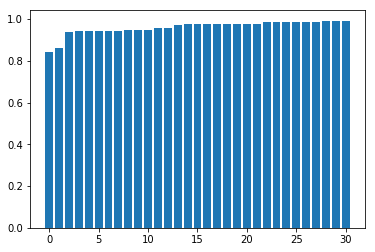

In [87]:
plt.bar(np.arange(scoreDF.shape[0]), scoreDF.mean(axis=1).sort_values())

In [56]:
len(scoreRows)

32

In [61]:
scoreDF.shape[1]

20

In [63]:
syn = synapseclient.login()

Welcome, Kyle Ellrott!



In [79]:
t = syn.tableQuery("select * from syn18145401").asDataFrame()
finalDF = t.set_index(t["Group"])

<BarContainer object of 16 artists>

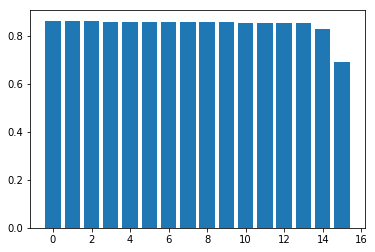

In [85]:
plt.bar( np.arange(len(finalDF["Mean_Tau_B"])), finalDF["Mean_Tau_B"] )

In [90]:
subSel = finalDF.index.intersection( scoreDF.index )

In [103]:
subOrder = finalDF["Mean_Tau_B"][subSel].sort_values().index

[]

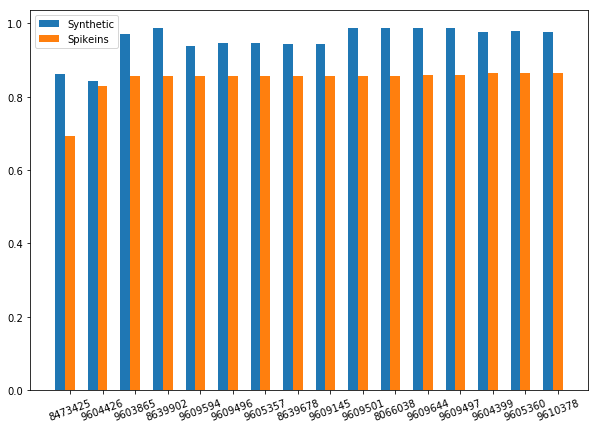

In [104]:
#plt.figure(figsize=(6,8))
ind = np.arange(len(subOrder)) 
width = 0.3
fig, ax = plt.subplots(figsize=(10,7))
p1 = ax.bar(ind - width, scoreDF.mean(axis=1)[subOrder], width, label="Synthetic")
p2 = ax.bar(ind , finalDF["Mean_Tau_B"][subOrder], width, label="Spikeins")
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(subSel, rotation=20)
plt.plot()

In [ ]:
methods = {
    7141463	NA
7150823	kallisto
7150898	kallisto
7185755	rsem
7217266	hera
7217268	hera
7217274	hera
7221538	hera
7221586	hera
7348543	hera
7348564	hera
7351104	hera
7352612	hera
7353450	hera
7355484	hera
7358038	hera
7363252	hera
7367548	hera
7899344	hera
7899426	hera
8023084	rsem
8052898	kallisto
8057844	kallisto
8064391	hera
8066038	hera
8277921	rsem
8277922	rsem
8289451	kallisto
8289452	kallisto
8294423	kallisto
8294427	kallisto
8294430	kallisto
8399815	kallisto
8473425	salmon
8555063	kallisto
8555064	kallisto
8639678	rsem
8639697	rsem
8639700	rsem
8639902	kallisto
8649616	kallisto
8693872	GSnap
8693880	GSnap
9603571	kallisto
9603573	express
9603865	kallisto
9604399	express
9604426	salmon
9605357	rsem
9605360	cufflinks
9607675	hera
9608592	thucmi
9608599	bowtie2
9608684	bowtie2
9608941	bowtie2
9609145	hera
9609496	rsem
9609497	rsem
9609501	hera
9609594	kallisto
9609644	kallisto
9610018	GSnap
9610020	GSnap
9610378	fluxcapacitor
9614357	GSnap